In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
res = pd.read_csv("results.csv")
res

,Unnamed: 0,trial_id,iteration,test_metric,strategy,seed,score
0,0,357cc_00000,0,0.328714,least_confidence,1,181.737643
1,1,357cc_00000,1,0.399286,least_confidence,1,181.737643
2,2,357cc_00000,2,0.471286,least_confidence,1,181.737643
3,3,357cc_00000,3,0.511286,least_confidence,1,181.737643
4,4,357cc_00000,4,0.557643,least_confidence,1,181.737643
...,...,...,...,...,...,...,...
6270,6270,357cc_00024,246,0.795214,random,5,187.607071
6271,6271,357cc_00024,247,0.791857,random,5,187.607071
6272,6272,357cc_00024,248,0.792071,random,5,187.607071
6273,6273,357cc_00024,249,0.792071,random,5,187.607071


In [3]:
res[res.strategy=="random"]

,Unnamed: 0,trial_id,iteration,test_metric,strategy,seed,score
5020,5020,357cc_00020,0,0.305786,random,1,189.461357
5021,5021,357cc_00020,1,0.400214,random,1,189.461357
5022,5022,357cc_00020,2,0.418929,random,1,189.461357
5023,5023,357cc_00020,3,0.500286,random,1,189.461357
5024,5024,357cc_00020,4,0.559929,random,1,189.461357
...,...,...,...,...,...,...,...
6270,6270,357cc_00024,246,0.795214,random,5,187.607071
6271,6271,357cc_00024,247,0.791857,random,5,187.607071
6272,6272,357cc_00024,248,0.792071,random,5,187.607071
6273,6273,357cc_00024,249,0.792071,random,5,187.607071


In [4]:
aucs = res.drop_duplicates(subset=["strategy","seed"])
agg = aucs.groupby("strategy")["score"]
mean_aucs, std_aucs = agg.mean(), agg.std()
aucs = pd.concat((mean_aucs, std_aucs), axis=1)
aucs.columns = ["avg", "stdv"]
aucs["score"] = aucs.apply(lambda row: f"{row.avg:.2f} ± {row.stdv:.2f}"  ,axis=1)
label_to_auc = dict(zip(aucs.index, aucs["score"]))

/var/folders/02/fbyrwz_s7tg4vmbm1kswhxp40000gp/T/ipykernel_26133/2952143151.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([int(label) + 10 for label in current_xticks])


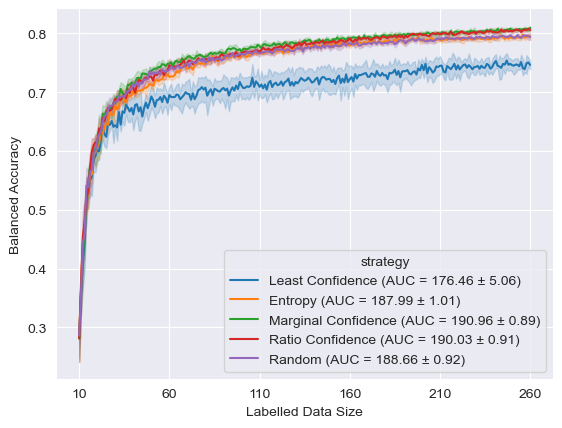

In [5]:
sns.set_style("darkgrid")

sns.lineplot(data=res, x="iteration", y="test_metric", hue="strategy")
plt.ylabel("Balanced Accuracy")
plt.xlabel("Labelled Data Size")

current_xticks = plt.gca().get_xticks()
plt.gca().set_xticklabels([int(label) + 10 for label in current_xticks])

ax = plt.gca()
legend = ax.get_legend()
for text in legend.get_texts():
    label = text.get_text()
    new_label = f"{label.replace('_', ' ').title()} (AUC = {label_to_auc[label]})"
    text.set_text(new_label)
    

for spine in ax.spines.values():
    spine.set_visible(False)